In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
import geopandas as gpd
from gnss_to_neu import convert_gnss_to_neu

### Import mining region

In [2]:
# --- Read shapefile ---
shp_area = r"maps\concessions_SL\Concessions_SL_area_v1.shp"
gdf_area = gpd.read_file(shp_area)

# Ensure shapefile is in lat/lon
gdf_area = gdf_area.to_crs(epsg=4326)

### Import GNSS

In [3]:
# --- Load ---
path = "gnss/gnss_data.csv"
df = pd.read_csv(path)

# --- Parse + clean ---
df["dates"] = pd.to_datetime(df["dates"], errors="coerce")
df = df.dropna(subset=["dates"])  # drop rows with bad dates

In [4]:
df.head(5)

,pnt_id,pnt_name,pnt_lat,pnt_lon,pnt_xrd,pnt_yrd,dates,n,e,u,sn,se,su
0,0591,Aachen,50.767778,6.088333,204465.62255,308885.632138,2002-11-20,0.000426,0.007671,0.005879,0.000932,0.000673,0.002627
1,0591,Aachen,50.767778,6.088333,204465.62255,308885.632138,2007-11-12,0.000447,-0.001009,-0.005334,0.000888,0.000654,0.002506
2,0591,Aachen,50.767778,6.088333,204465.62255,308885.632138,2007-11-11,0.000381,0.000116,-0.005035,0.000889,0.000652,0.002511
3,0591,Aachen,50.767778,6.088333,204465.62255,308885.632138,2007-11-10,0.000678,-0.001208,-0.006365,0.000893,0.000657,0.002522
4,0591,Aachen,50.767778,6.088333,204465.62255,308885.632138,2007-11-09,-0.000864,-0.002044,-0.009819,0.000904,0.000663,0.002558


### Import InSAR

In [5]:
loc1 = r"insar/sentinel1_asc_t088_limburg.csv"

insar_asc_data = pd.read_csv(loc1, sep=',')
display(insar_asc_data.head())

,Unnamed: 0,pnt_id,pnt_flags,pnt_lat,pnt_lon,pnt_line,pnt_pixel,pnt_height,pnt_demheight,pnt_demheight_highres,...,d_20220713,d_20220725,d_20220806,d_20220818,d_20220830,d_20220911,d_20220923,d_20221005,d_20221017,d_20221029
0,8666284,L00012395P00030381,11,50.830029,6.035176,12395,30381,215.67052,221.34067,221.34067,...,0.00017,-0.00903,-0.00341,-0.00538,0.00226,0.00216,0.00246,0.00505,-0.00143,0.00755
1,8667671,L00012396P00030366,101,50.830063,6.034464,12396,30366,222.71645,218.97993,218.97993,...,-0.00405,0.00065,-0.00606,-0.00593,-0.00331,-0.00459,-0.00510,-0.01321,-0.00378,-0.00928
2,8667672,L00012396P00030367,101,50.830044,6.034565,12396,30367,224.24109,219.15625,219.15625,...,-0.00677,-0.00200,-0.00853,-0.00908,-0.00586,-0.00763,-0.01031,-0.01234,-0.00587,-0.01151
3,8667673,L00012396P00030368,101,50.830071,6.034538,12396,30368,222.49604,219.33257,219.33257,...,-0.00430,0.00108,-0.00560,-0.00628,-0.00352,-0.00579,-0.00590,-0.01655,-0.00313,-0.00861
4,8667674,L00012396P00030369,101,50.830078,6.034555,12396,30369,220.54963,219.50887,219.50887,...,-0.00330,0.00158,-0.00489,-0.00538,-0.00317,-0.00518,-0.00550,-0.01635,-0.00192,-0.00798


In [6]:
insar_asc_u = convert_gnss_to_neu(insar_asc_data)

In [7]:
# Display all columns from the csv file to see all information that is in the .csv file
print(insar_asc_u.columns.tolist())

['Unnamed: 0', 'pnt_id', 'pnt_flags', 'pnt_lat', 'pnt_lon', 'pnt_line', 'pnt_pixel', 'pnt_height', 'pnt_demheight', 'pnt_demheight_highres', 'pnt_geoid', 'pnt_incidangle', 'pnt_enscoh', 'pnt_ampconsist', 'pnt_quality', 'pnt_linear', 'pnt_quadratic', 'pnt_seasonal_cos', 'pnt_seasonal_sin', 'pnt_ds_nr_neighbors', 'u_d_20171001', 'u_d_20171007', 'u_d_20171019', 'u_d_20171031', 'u_d_20171112', 'u_d_20171124', 'u_d_20171206', 'u_d_20171218', 'u_d_20171230', 'u_d_20180111', 'u_d_20180123', 'u_d_20180204', 'u_d_20180216', 'u_d_20180228', 'u_d_20180312', 'u_d_20180324', 'u_d_20180405', 'u_d_20180417', 'u_d_20180429', 'u_d_20180511', 'u_d_20180523', 'u_d_20180604', 'u_d_20180616', 'u_d_20180628', 'u_d_20180710', 'u_d_20180722', 'u_d_20180803', 'u_d_20180815', 'u_d_20180827', 'u_d_20180902', 'u_d_20180908', 'u_d_20180920', 'u_d_20181002', 'u_d_20181014', 'u_d_20181026', 'u_d_20181107', 'u_d_20181119', 'u_d_20181201', 'u_d_20181213', 'u_d_20181225', 'u_d_20190106', 'u_d_20190118', 'u_d_20190130',

In [8]:
# Extract the dates from the .csv file
dates = pd.to_datetime(insar_asc_u.filter(regex='^d_20').columns, format='d_%Y%m%d')

# Extract the displacement data from the .csv file
displacement_data = insar_asc_u.filter(regex='^d_20')

In [9]:
# Calculate the nr of days between the observations where the first observations is day 0
days = (dates- dates[0]).days
years = days/365


IndexError: index 0 is out of bounds for axis 0 with size 0

### Plot all data

C:\Users\Nigel\AppData\Local\Temp\ipykernel_5260\1438068431.py:52: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


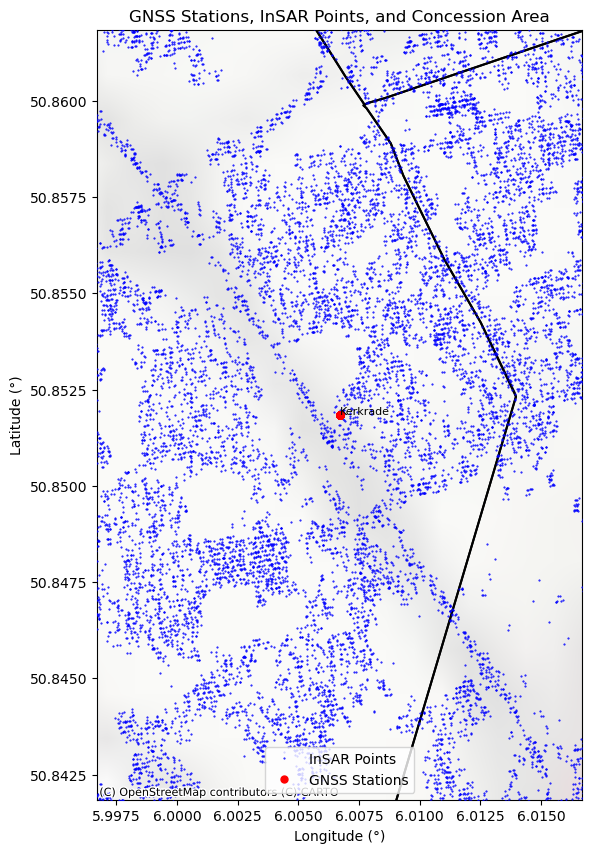

In [ ]:
# --- Create figure ---
fig, ax = plt.subplots(figsize=(10, 10))

# --- Plot concession area ---
gdf_area.plot(
    ax=ax,
    edgecolor="black",
    facecolor="none",
    linewidth=1.5,
    zorder=2,
    label="Concession Area"
)

# --- Plot InSAR points ---
ax.plot(
    insar_asc_u.pnt_lon,
    insar_asc_u.pnt_lat,
    ".",
    color="blue",
    markersize=1,
    alpha=1,
    label="InSAR Points",
    zorder=3
)

# --- Plot GNSS stations ---
ax.plot(
    df["pnt_lon"],
    df["pnt_lat"],
    "o",
    color="red",
    markersize=5,
    label="GNSS Stations",
    zorder=4
)

# --- Add GNSS station labels ---
# for name in df["pnt_name"].unique():
#     subset = df[df["pnt_name"] == name]
#     ax.text(
#         subset["pnt_lon"].iloc[0],
#         subset["pnt_lat"].iloc[0],
#         name,
#         fontsize=8,
#         zorder=5
#     )

# --- Labels & title ---
ax.set_xlabel("Longitude (°)")
ax.set_ylabel("Latitude (°)")
ax.set_title("GNSS Stations, InSAR Points, and Concession Area")
ax.legend()

station_name = "Kerkrade"
buffer = 0.01

st = df.loc[df["pnt_name"] == station_name].iloc[0]
x0, y0 = st["pnt_lon"], st["pnt_lat"]

xmin, xmax = x0 - buffer, x0 + buffer
ymin, ymax = y0 - buffer, y0 + buffer

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)


#label only stations inside current view
df_view = df[(df["pnt_lon"].between(xmin, xmax)) & (df["pnt_lat"].between(ymin, ymax))]

for name in df_view["pnt_name"].unique():
    s = df_view[df_view["pnt_name"] == name].iloc[0]
    ax.text(s["pnt_lon"], s["pnt_lat"], name, fontsize=8, zorder=10, clip_on=True)

#--- Add basemap (NO API KEY REQUIRED) ---
ctx.add_basemap(
    ax,
    crs="EPSG:4326",
    source=ctx.providers.CartoDB.Positron,
    zoom=10
)

plt.show()


C:\Users\Nigel\AppData\Local\Temp\ipykernel_5260\385600993.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


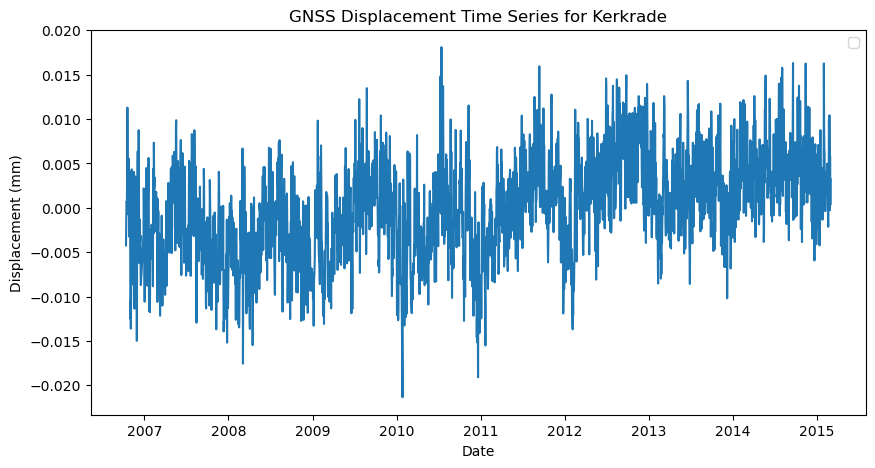

In [ ]:
# Plot Kerkrade timeseries

station_name = "Kerkrade"
time_series = df[df["pnt_name"] == station_name].copy()

time_series = time_series.sort_values(by="dates")

plt.figure(figsize=(10, 5))
plt.plot(time_series["dates"], time_series["u"])
plt.xlabel("Date")
plt.ylabel("Displacement (mm)")
plt.title(f"GNSS Displacement Time Series for {station_name}")
plt.legend()
plt.show()


